In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10000  # Sampling rate (Hz)
N = 32      # Number of samples
t = np.arange(N) / fs  # Time vector

# Frequencies to include
frequencies = [100, 500, 1000, 2500, 5000]  # Hz

# Generate composite signal
signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Normalize to 3.3Vpp and add 1.65V DC offset
signal = (signal / np.max(np.abs(signal))) * (3.3 / 2) + 1.65

# Print values as C-style array for firmware
c_array = ', '.join(f'{x:.4f}f' for x in signal)
print(f"float test_samples[32] = {{ {c_array} }};")


float test_samples[32] = { 1.6500f, 2.7278f, 2.5653f, 2.1711f, 2.6331f, 2.9200f, 2.0523f, 1.2561f, 1.7152f, 2.3414f, 1.9733f, 1.6039f, 2.2263f, 2.6791f, 1.8740f, 0.9950f, 1.2680f, 1.7139f, 1.3013f, 1.1181f, 2.1731f, 3.2260f, 3.0366f, 2.6137f, 3.0453f, 3.3000f, 2.3987f, 1.5675f, 1.9905f, 2.5794f, 2.1731f, 1.7647f };


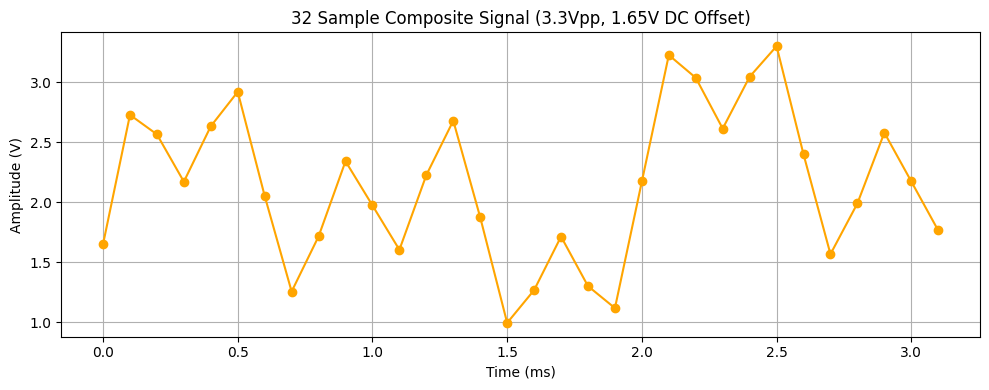

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(t * 1000, signal, marker='o', color='orange')
plt.title("32 Sample Composite Signal (3.3Vpp, 1.65V DC Offset)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.tight_layout()
plt.show()


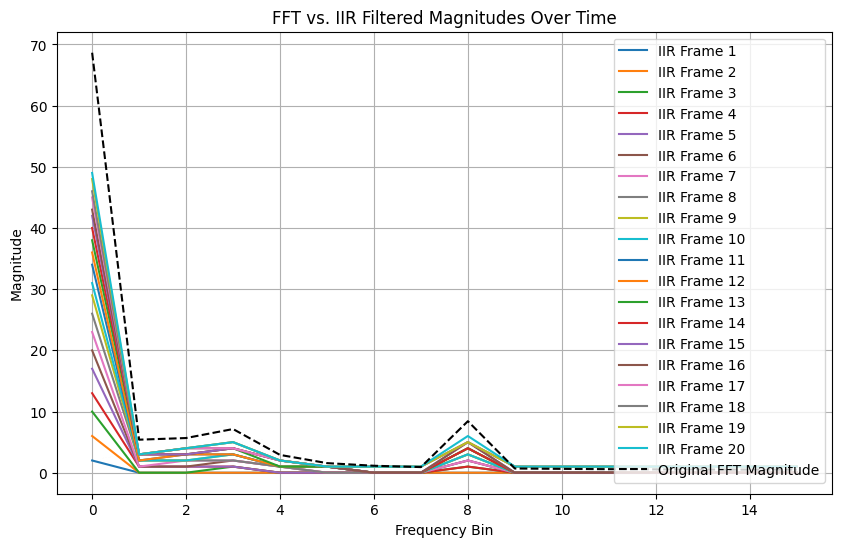

In [ ]:
import matplotlib.pyplot as plt

# FFT and IIR values from your log (just a small example; use full dataset)
fft_values = [68.65, 5.40, 5.67, 7.14, 2.91, 1.57, 1.14, 0.92, 8.42, 0.69, 0.63, 0.58, 0.55, 0.52, 0.51, 0.50]

iir_frames = [
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # [10, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    # [13, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    # [17, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    # [20, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    # [23, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    # [26, 2, 2, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    # [29, 2, 2, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    # [31, 2, 2, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    # [34, 2, 3, 3, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    # [36, 2, 3, 3, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    # [38, 3, 3, 4, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    # [40, 3, 3, 4, 2, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    # [42, 3, 3, 4, 2, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
    # [43, 3, 4, 4, 2, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
    # [45, 3, 4, 4, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1],
    # [46, 3, 4, 5, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1],
    # [48, 3, 4, 5, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1],
    # [49, 3, 4, 5, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1]

]

# Plot FFT (baseline) and evolving IIR filter output
plt.figure(figsize=(10, 6))

for i, frame in enumerate(iir_frames):
    plt.plot(frame, label=f'IIR Frame {i+1}')

plt.plot(fft_values, '--', color='black', label='Original FFT Magnitude')
plt.title('FFT vs. IIR Filtered Magnitudes Over Time')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()